In [6]:
market_caps = {'BAC': 37312000000,
 'AMZN': 1670000000000,
 'WFC': 197110000000,
 'HPQ': 31140000000,
 'DANOY': 42730000000,
 'DIS': 321160000000,
 'WMT': 389440000000,
 'UPS': 159830000000,
 'SAP': 160920000000,
 'AAPL': 2360000000000,
 'GM': 85030000000,
 'T': 191140000000,
 'F': 60400000000,
 'C': 146640000000,
 'KO': 233620000000,
 'SIE.DE': 132110000000,
 'META': 947920000000,
 'JPM': 508640000000,
 'CS.PA': 66720000000,
 'INTC': 218310000000,
 'VOW.DE': 134270000000,
 'NTDOY': 56920000000,
 'FDX': 59360000000,
 'CSCO': 232310000000,
 'FOX': 23450000000,
 'COST': 199640000000,
 'CVS': 111330000000,
 'NFLX': 280010000000,
 'MSFT': 2220000000000,
 'HD': 352850000000,
 'MCD': 184980000000,
 'TMUS': 151280000000,
 'NESN.SW': 342500000000,
 'DELL': 80380000000,
 'HYMTF': 50150000000,
 'YUM': 36480000000,
 'SBUX': 131140000000,
 'DE': 106400000000,
 'KER.PA': 90000000000,
 'TM': 240410000000,
 'BMW.DE': 63490000000,
 'ADDYY': 61510000000,
 'LRLCF': 230270000000,
 'PM': 148610000000,
 'HSBC': 116680000000,
 'SONY': 133290000000,
 'AXP': 139140000000,
 'EBAY': 48790000000,
 'PYPL': 305580000000,
 'RMS.PA': 145260000000,
 'ORCL': 258030000000,
 'POAHY': 70000000000,
 'IBM': 104780000000,
 'PEP': 215730000000,
 'NKE': 241350000000,
 'SSNLF': 401880000000,
 'QSR': 23750000000,
 'CAT': 106840000000,
 'V': 505300000000,
 'GOOG': 1870000000000
}

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


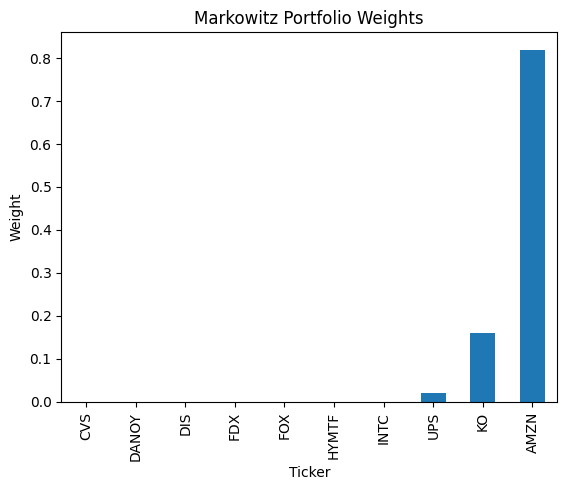

3.7158074163691333


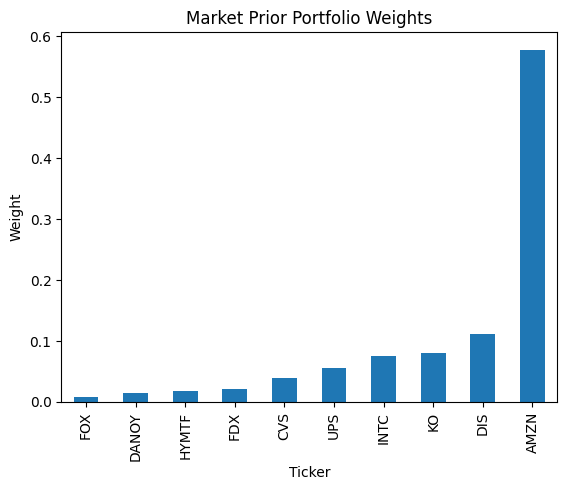

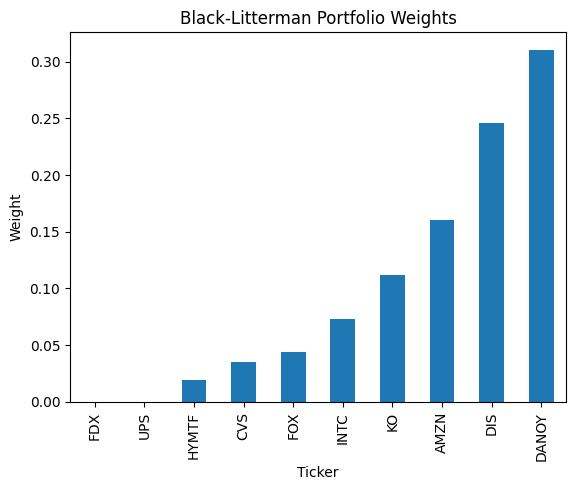

In [13]:
def plot_weights(weights, title):
    weights = pd.Series(weights)
    weights.sort_values(inplace=True)
    weights.plot(kind='bar', title=title)
    plt.ylabel('Weight')
    plt.xlabel('Ticker')
    plt.show()

tickers = ["AMZN", "CVS", "KO", "DANOY", "DIS", "FDX", "FOX", "HYMTF", "INTC",  "UPS"]
market_caps = {'AMZN': 1670000000000,
 'CVS': 111330000000,
 'KO': 233620000000,
 'DANOY': 42730000000,
 'DIS': 321160000000,
 'FDX': 59360000000,
 'FOX': 23450000000,
 'HYMTF': 50150000000,
 'INTC': 218310000000,
 'UPS': 159830000000}

data = yf.download(tickers, start="2017-01-01", end="2021-10-15")['Adj Close']

market_data = yf.download("^GSPC", start="2017-01-01", end="2021-10-15")['Adj Close']

cov_matrix = risk_models.sample_cov(data)

mu = expected_returns.mean_historical_return(data)

ef_markowitz = EfficientFrontier(mu, cov_matrix)
weights_markowitz = ef_markowitz.max_sharpe(0.006)
cleaned_weights_markowitz = ef_markowitz.clean_weights()

plot_weights(cleaned_weights_markowitz, "Markowitz Portfolio Weights")

delta = black_litterman.market_implied_risk_aversion(market_data)

market_prior = black_litterman.market_implied_prior_returns(market_caps, delta, cov_matrix)

ef_prior = EfficientFrontier(market_prior, cov_matrix)
weights_prior = ef_prior.max_sharpe(0.006)
cleaned_weights_prior = ef_prior.clean_weights()

plot_weights(cleaned_weights_prior, "Market Prior Portfolio Weights")

views = {"AMZN": 0.12, "DIS": 0.15, "DANOY": 0.11,  "FOX": 0.16, "FDX": 0.1} 
confidences = {ticker: 1 for ticker in views}  

bl = BlackLittermanModel(cov_matrix, pi=pd.Series(market_prior), absolute_views=views, omega="idzorek", view_confidences=list(confidences.values()))

rets = bl.bl_returns()
ef = EfficientFrontier(rets, cov_matrix)

weights = ef.max_sharpe(0.006)
cleaned_weights = ef.clean_weights()

plot_weights(cleaned_weights, "Black-Litterman Portfolio Weights")


In [83]:
#imported from backtesting
covid = {'CVS Health': 0.14404953051643188, 'Google': 0.1593085011185682, 'AT&T': -0.0131670480549199, 'Amazon': 0.068051376146789, 'Honda': 0.025496145124716568, 'Meta': 0.18978382687927106, 'Bank of America': 0.1991467120181406, 'Walmart': 0.07094060324825983, 'UPS': 0.040787699316628685, 'Coke': 0.3779595890410958, 'Siemens': 0.31321241379310333, 'AXA': 0.32490093240093265, 'HP Inc.': 0.13837835990888375, 'Ford': 0.07708359908883833, 'Apple': -0.001746347031963494, 'Citigroup': 0.012884210526315828, 'Dell': 0.11612821100917424, 'UBS Group': 0.1054324263038548, 'SAP': 0.03781640091116167, 'General Motors': 0.0761608695652174, 'JPMorgan': 0.3525163120567379, 'Hyundai Motor Company': 0.18835954022988513, 'Netflix': 0.1896023201856148, 'Cisco': 0.11555599078341008, 'Nintendo': 0.10300391705069123, 'Volkswagen': 0.15829655963302744, 'Visa': 0.2552770642201835, 'Disney': 0.19809419953596297, 'Mcdonalds': -0.00796915662650604, 'American Express': 0.45699322033898293, 'Porsche': 0.34504531722054355, 'Yum! Brands': 0.09587446808510643, 'Danone': 0.016374220963172776, 'Intel': 0.12770873563218393, 'Fox Corporation': -0.12337406542056076, 'Costco': 0.1659559718969557, 'Starbucks': 0.21061619718309854, 'Home Depot': 0.20430308056872049, 'Nike': 0.11078646616541349, 'BMW': 0.1187319347319347, 'eBay': 0.24006135831381745, 'Nestle': 0.29099411764705885, 'John Deere': 0.2169145728643216, "Lowe's": 0.1623029962546817, 'Sony': 0.17211381733021072, 'PayPal': 0.29662318840579716, 'FedEx': 0.1435090047393365, 'Kering': 0.11420683962264151, 'Pepsi': 0.17715124999999998, 'Microsoft': 0.2418716627634661, 'Verizon': 0.19285884353741475, 'Budweiser': 0.12725131086142324, 'Accenture': 0.3391945945945947, 'Toyota': 0.151583870967742, 'Samsung': 0.2236489898989902, 'IBM': 0.16699889502762422, 'Adobe': 0.4106027888446214, 'Allianz': 0.16440915032679734, 'Goldman Sachs': 0.1298113314447591, 'Restaurant Brands International': 0.07973447293447292, 'Mastercard': 0.32929447513812155, 'Wells Fargo': 0.2449693798449611, 'Philip Morris': 0.1763415966386555, 'Hermes': 0.2223153439153438, 'T-Mobile US': 0.3303081871345026, 'General Electric': 0.05944838709677419, 'Caterpillar': 0.34518499999999996, 'Adidas': 0.3436882697947215, 'Oracle': 0.14315603448275857, 'Colgate-Palmolive': 0.2390326923076923, 'Heineken': 0.36086158536585355, 'Zara': 0.24217614213197974, 'HSBC': 0.16613277310924368, "L'oreal": 0.49649999999999994, 'Banco Santander': 0.20479729729729726}




twitter = {'CVS Health': 0.004716197183098598, 'Google': -0.0023997762863534637, 'AT&T': -0.0036297482837528605, 'Amazon': 0.003566055045871561, 'Honda': -0.046163945578231336, 'Meta': -0.003981321184510253, 'Bank of America': 0.0010523809523809542, 'Walmart': 0.0047580046403712245, 'UPS': 0.013946924829157182, 'Coke': -0.006666210045662102, 'Siemens': 0.014031954022988515, 'AXA': 0.008768065268065275, 'HP Inc.': 0.012853302961275627, 'Ford': -0.007523006833712986, 'Apple': -0.002754794520547946, 'Citigroup': 0.008358810068649894, 'Dell': 0.014825000000000005, 'UBS Group': 0.015200453514739224, 'SAP': 0.014593621867881563, 'General Motors': -0.00735995423340962, 'JPMorgan': 0.005626241134751771, 'Hyundai Motor Company': -0.04827149425287357, 'Netflix': 0.008661252900232015, 'Cisco': 0.012947235023041476, 'Nintendo': 0.003043087557603689, 'Volkswagen': -0.027732110091743128, 'Visa': 0.013435091743119272, 'Disney': -0.002004872389791183, 'Mcdonalds': -0.0005546987951807206, 'American Express': 0.013043583535108969, 'Porsche': -0.01252537764350453, 'Yum! Brands': -0.0013070921985815602, 'Danone': -0.008884135977337105, 'Intel': 0.0012744827586206899, 'Fox Corporation': -0.00832967289719626, 'Costco': 0.09008407494145201, 'Starbucks': 0.014632863849765268, 'Home Depot': 0.06228412322274883, 'Nike': 0.02197393483709274, 'BMW': -0.01278601398601399, 'eBay': 0.02523208430913348, 'Nestle': 0.01268870588235294, 'John Deere': 0.03263567839195981, "Lowe's": 0.015222846441947565, 'Sony': 0.0018711943793911, 'PayPal': 0.03160434782608695, 'FedEx': 0.011927962085308061, 'Kering': -0.007779481132075469, 'Pepsi': 0.018607250000000006, 'Microsoft': 0.0044016393442622955, 'Verizon': 0.006898979591836731, 'Budweiser': 0.001452059925093634, 'Accenture': 0.00863243243243242, 'Toyota': -0.012063027295285354, 'Samsung': 0.008932323232323233, 'IBM': 0.003210220994475138, 'Adobe': 0.022799203187251, 'Allianz': 0.004546405228758164, 'Goldman Sachs': 0.0033722379603399423, 'Restaurant Brands International': 0.003946153846153848, 'Mastercard': 0.00727348066298343, 'Wells Fargo': -0.02001240310077519, 'Philip Morris': 0.024792857142857148, 'Hermes': 0.0, 'T-Mobile US': -0.00011403508771929654, 'General Electric': 0.007438709677419355, 'Caterpillar': 0.02564500000000001, 'Adidas': 0.006197067448680353, 'Oracle': 0.01043405172413793, 'Colgate-Palmolive': 0.03123269230769231, 'Heineken': -0.016460975609756092, 'Zara': 0.01926497461928937, 'HSBC': -0.019096638655462184, "L'oreal": 0.006826356589147286, 'Banco Santander': -0.0010054054054054033}




news = {'CVS Health': 0.010752112676056334, 'Google': -0.027753243847874722, 'AT&T': -0.005011441647597255, 'Amazon': -0.008927293577981651, 'Honda': -0.002523809523809519, 'Meta': -0.06438587699316627, 'Bank of America': -0.02185396825396826, 'Walmart': 0.0027795823665893254, 'UPS': 0.054176765375854204, 'Coke': 0.04485319634703201, 'Siemens': 0.01296873563218391, 'AXA': -0.009882284382284388, 'HP Inc.': -0.023056036446469263, 'Ford': -0.011705239179954441, 'Apple': -0.008422831050228312, 'Citigroup': -0.07097116704805494, 'Dell': 0.01200160550458717, 'UBS Group': -0.0038587301587301548, 'SAP': -0.0083375854214123, 'General Motors': -0.011413043478260868, 'JPMorgan': -0.019758865248226943, 'Hyundai Motor Company': 0.001180229885057471, 'Netflix': 0.011046403712296976, 'Cisco': 0.0013624423963133623, 'Nintendo': 0.005944930875576036, 'Volkswagen': -0.028114678899082594, 'Visa': -0.006283944954128444, 'Disney': -0.005041299303944316, 'Mcdonalds': -0.019786506024096383, 'American Express': -0.018914285714285713, 'Porsche': -0.008631722054380665, 'Yum! Brands': 0.03946879432624114, 'Danone': -0.02191303116147308, 'Intel': -0.003869195402298853, 'Fox Corporation': -0.020846495327102803, 'Costco': 0.16624754098360656, 'Starbucks': 0.0013396713615023367, 'Home Depot': 0.11519597156398105, 'Nike': -0.0006233082706766989, 'BMW': -0.0009272727272727279, 'eBay': 0.01783981264637002, 'Nestle': 0.020897647058823528, 'John Deere': 0.0593979899497487, "Lowe's": 0.1469681647940075, 'Sony': 0.00804566744730679, 'PayPal': 0.00436666666666671, 'FedEx': 0.057932701421800965, 'Kering': 0.025992216981132063, 'Pepsi': 0.02667099999999998, 'Microsoft': 0.0036384074941451993, 'Verizon': 0.007476190476190476, 'Budweiser': -0.019139325842696637, 'Accenture': 0.03850945945945946, 'Toyota': -0.0010431761786600506, 'Samsung': 0.0034898989898989974, 'IBM': -0.013383701657458568, 'Adobe': 0.023127091633466122, 'Allianz': -0.0191562091503268, 'Goldman Sachs': -0.012346458923512743, 'Restaurant Brands International': -0.02676752136752133, 'Mastercard': -0.007828176795580111, 'Wells Fargo': -0.12280697674418609, 'Philip Morris': 0.03143907563025207, 'Hermes': 0.0888031746031746, 'T-Mobile US': -0.004662280701754382, 'General Electric': 0.007119354838709686, 'Caterpillar': 0.042825000000000016, 'Adidas': -0.021371260997067442, 'Oracle': -0.012489655172413794, 'Colgate-Palmolive': 0.06089423076923076, 'Heineken': -0.04841585365853659, 'Zara': -0.042479695431472085, 'HSBC': -0.04436134453781513, "L'oreal": 0.031890697674418614, 'Banco Santander': 0.008113513513513512}




esg = {'CVS Health': -0.11508215962441233, 'Google': 0.12314921700223712, 'AT&T': 0.00722356979405034, 'Amazon': 0.029045642201834827, 'Honda': -0.030915646258503595, 'Meta': 0.04611867881548973, 'Bank of America': 0.06234104308390006, 'Walmart': 0.061686774941995114, 'UPS': -0.045685193621867966, 'Coke': 5.385200000000008, 'Siemens': 0.15133908045976982, 'AXA': 0.019425174825174814, 'HP Inc.': -0.004212528473804103, 'Ford': -0.020469931662870207, 'Apple': 0.10068378995433791, 'Citigroup': -0.010903432494279323, 'Dell': 0.01608073394495413, 'UBS Group': 0.1061108843537415, 'SAP': -0.02942619589977228, 'General Motors': 0.05149656750572077, 'JPMorgan': 0.16967683215130056, 'Hyundai Motor Company': 0.05257977011494239, 'Netflix': -0.058801392111368894, 'Cisco': -0.008393317972350375, 'Nintendo': -0.012217741935483887, 'Volkswagen': 0.06918532110091737, 'Visa': -0.05694449541284435, 'Disney': -0.12145081206496455, 'Mcdonalds': -0.012034216867469957, 'American Express': -0.10960556900726373, 'Porsche': -0.010970694864048303, 'Yum! Brands': -0.1297643026004718, 'Danone': -0.010645325779036836, 'Intel': -0.03777287356321871, 'Fox Corporation': -0.14646425233644747, 'Costco': -0.014786651053864189, 'Starbucks': 0.08461361502347443, 'Home Depot': -0.032640758293838924, 'Nike': -0.03033609022556406, 'BMW': -0.008810256410256446, 'eBay': 0.02106768149882904, 'Nestle': 0.013119058823529416, 'John Deere': 0.0, "Lowe's": 0.01312771535580524, 'Sony': -0.08241967213114736, 'PayPal': -0.007741062801932405, 'FedEx': -0.05424573459715658, 'Kering': -0.18569999999999848, 'Pepsi': 0.00439349999999994, 'Microsoft': 0.0535847775175643, 'Verizon': -0.07297006802721111, 'Budweiser': -0.038473408239700385, 'Accenture': -0.06804054054054055, 'Toyota': 0.039339454094292646, 'Samsung': 0.1554164141414139, 'IBM': 0.10132596685082859, 'Adobe': -0.013456175298804808, 'Allianz': -0.016992810457516317, 'Goldman Sachs': 0.07170623229461746, 'Restaurant Brands International': -0.08570826210826223, 'Mastercard': 0.0412740331491713, 'Wells Fargo': 0.10756124031007745, 'Philip Morris': 0.0, 'Hermes': -0.18570000000000017, 'T-Mobile US': -0.1694108187134494, 'General Electric': 0.05354838709677418, 'Caterpillar': -0.03740250000000001, 'Adidas': 0.018143108504398753, 'Oracle': -0.03381293103448285, 'Colgate-Palmolive': -0.14948269230769223, 'Heineken': -0.03904634146341465, 'Zara': -0.012255329949238595, 'HSBC': 0.1509361344537815, "L'oreal": 0.0, 'Banco Santander': 0.0966459459459459}

In [85]:
capped_esg = {k: min(max(v, -1), 1) for k, v in esg.items()}

In [1]:
# sentiment for the chosen companies below

In [142]:
covid_sentiments = {"AMZN": 0.068051376146789, "DIS": 0.19809419953596297, "DANOY": 0.016374220963172776,  "FOX": -0.12337406542056076, "FDX": 0.1435090047393365}

In [147]:
twitter_sentiments = {"AMZN": 0.003566055045871561, "DIS": -0.002004872389791183, "DANOY": -0.008884135977337105,  "FOX": -0.00832967289719626, "FDX": 0.011927962085308061}


In [144]:
news_sentiments = {"AMZN": -0.008927293577981651, "DIS": -0.005041299303944316, "DANOY": -0.02191303116147308,  "FOX": -0.020846495327102803, "FDX": 0.057932701421800965}

In [145]:
esg_sentiments = {"AMZN": 0.029045642201834827, "DIS": -0.12145081206496455, "DANOY": -0.010645325779036836,  "FOX": -0.14646425233644747, "FDX": -0.05424573459715658}


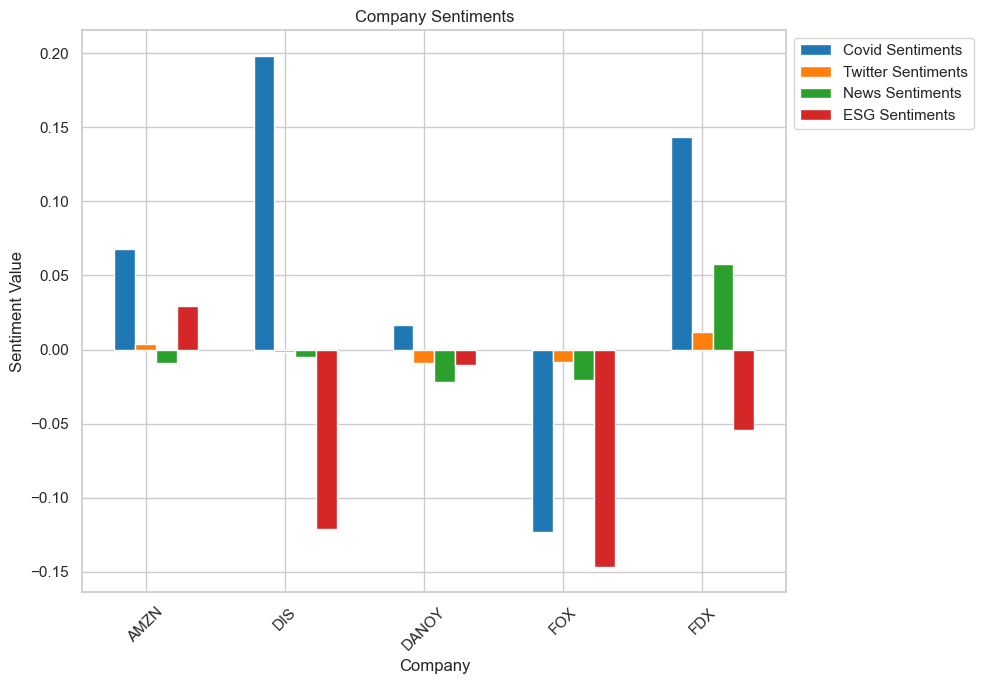

In [204]:
import matplotlib.pyplot as plt
import numpy as np

data = [covid_sentiments, twitter_senitments, news_sentiments, esg_sentiments]


labels = ['Covid Sentiments', 'Twitter Sentiments', 'News Sentiments', 'ESG Sentiments']

sns.set(style="whitegrid")

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

num_groups = len(data[0])

fig, ax = plt.subplots(figsize=(10, 7))

bar_width = 0.15
index = np.arange(num_groups)

for i, sentiment_data in enumerate(data):
    ax.bar(index + i*bar_width, list(sentiment_data.values()), bar_width, color=colors[i], label=labels[i])

ax.set_xticks(index + bar_width)
ax.set_xticklabels(list(covid_sentiments.keys()), rotation = 45)

plt.xlabel('Company')
plt.ylabel('Sentiment Value')
plt.title('Company Sentiments')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()




In [218]:
def calculate_confidence(return_view, sentiment_score, weight_factor):
    confidence = 0.75 - (return_view * weight_factor) + (sentiment_score * (weight_factor) * 2)
    return min(max(confidence, 0), 1.0)

In [14]:
def calculate_confidence(return_view, sentiment_score, weight_factor):
    confidence = 0.75 - (return_view * weight_factor) + (sentiment_score * (weight_factor))
    return min(max(confidence, 0), 1.0)

{'AMZN': 0.7136359633027524, 'DIS': 0.7836659396751741, 'DANOY': 0.684461954674221, 'FOX': 0.5516381542056075, 'FDX': 0.7804563033175356}


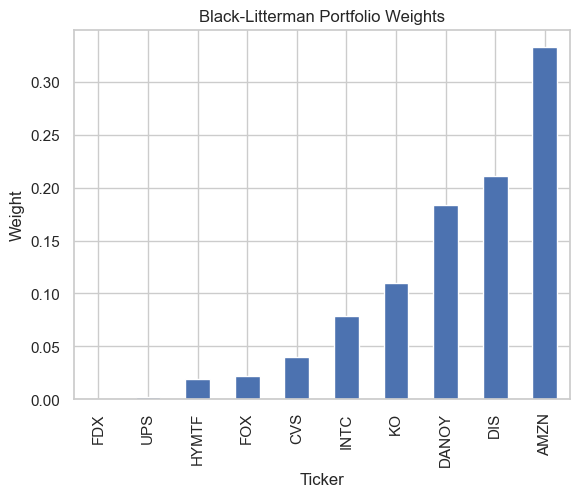

{'AMZN': 0.6684962385321102, 'DIS': 0.6435965893271461, 'DANOY': 0.6667811048158641, 'FOX': 0.6321692289719626, 'FDX': 0.6883495734597157}


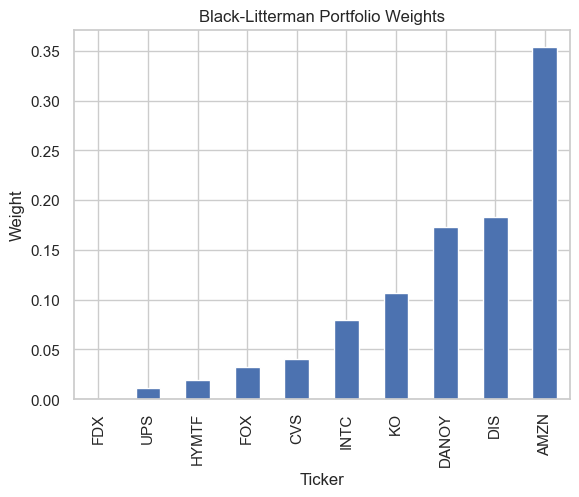

{'AMZN': 0.6597508944954129, 'DIS': 0.641471090487239, 'DANOY': 0.6576608781869688, 'FOX': 0.6234074532710281, 'FDX': 0.7205528909952608}


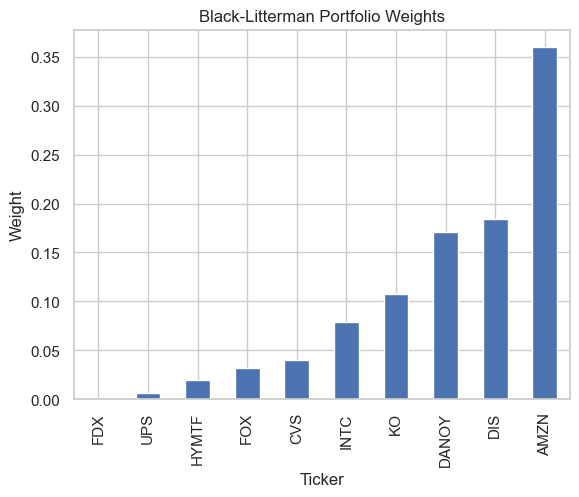

{'AMZN': 0.6863319495412844, 'DIS': 0.5599844315545248, 'DANOY': 0.6655482719546743, 'FOX': 0.5354750233644868, 'FDX': 0.6420279857819905}


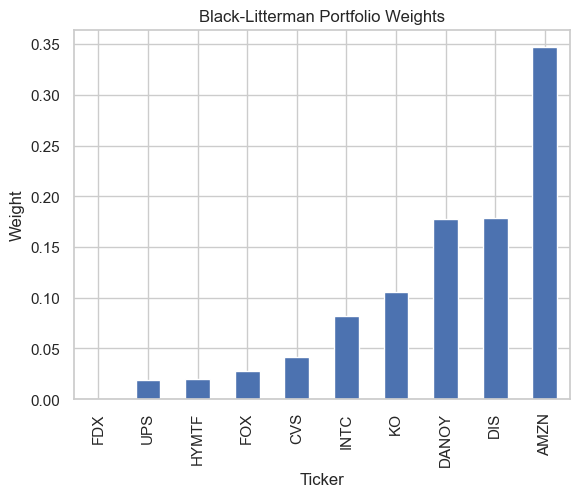

In [139]:
views = {"AMZN": 0.12, "DIS": 0.15, "DANOY": 0.11,  "FOX": 0.16, "FDX": 0.1}  
data = [covid_sentiments, twitter_senitments, news_sentiments, esg_sentiments]
for sentiments in data:
    
    confidences = {ticker: calculate_confidence(views[ticker], sentiments[ticker], 0.7) for ticker in views}
    print(confidences)

    bl = BlackLittermanModel(cov_matrix, pi=pd.Series(market_prior), absolute_views=views, omega="idzorek", view_confidences=list(confidences.values()))

    rets = bl.bl_returns()
    ef = EfficientFrontier(rets, cov_matrix)

    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()

    plot_weights(cleaned_weights, "Black-Litterman Portfolio Weights")

{'AMZN': 0.7612719266055046, 'DIS': 0.9223318793503481, 'DANOY': 0.695923909348442, 'FOX': 0.4652763084112149, 'FDX': 0.8809126066350712}
{'AMZN': 0.6709924770642203, 'DIS': 0.6421931786542924, 'DANOY': 0.6605622096317281, 'FOX': 0.6263384579439253, 'FDX': 0.6966991469194314}
{'AMZN': 0.6535017889908257, 'DIS': 0.637942180974478, 'DANOY': 0.6423217563739377, 'FOX': 0.6088149065420561, 'FDX': 0.7611057819905214}
{'AMZN': 0.7066638990825688, 'DIS': 0.4749688631090496, 'DANOY': 0.6580965439093485, 'FOX': 0.4329500467289735, 'FDX': 0.6040559715639808}
{'AMZN': 1.0, 'DIS': 1.0, 'DANOY': 1.0, 'FOX': 1.0, 'FDX': 1.0}


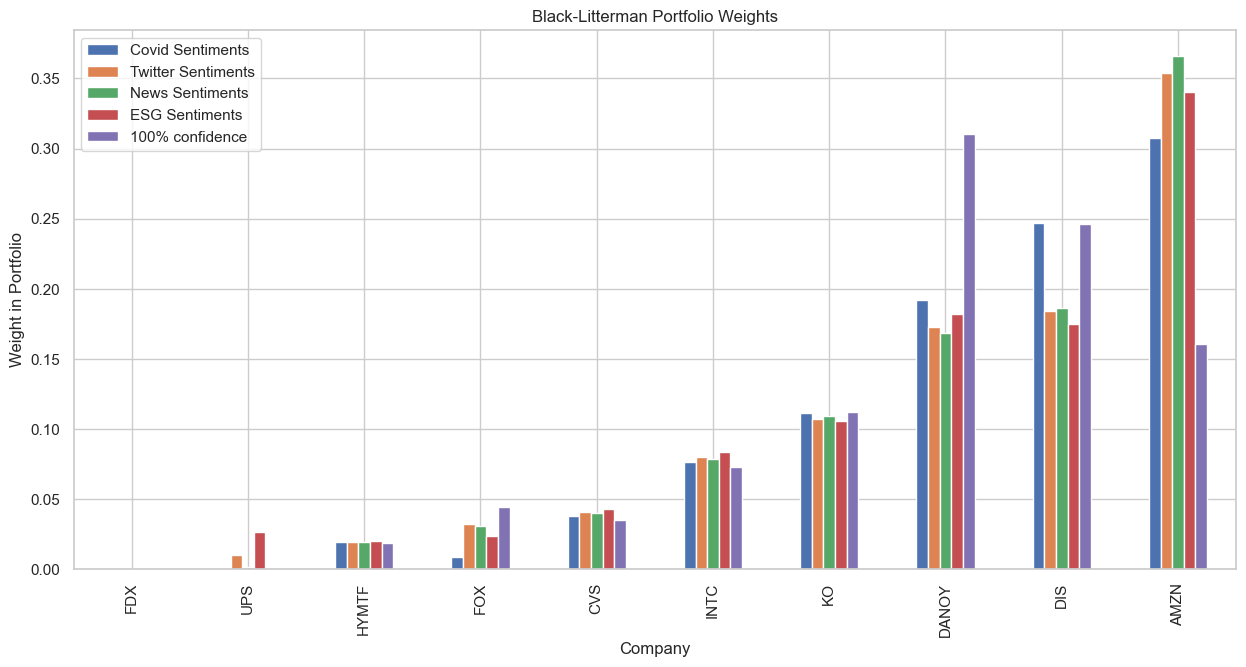

In [219]:
views = {"AMZN": 0.12, "DIS": 0.15, "DANOY": 0.11,  "FOX": 0.16, "FDX": 0.1}

full_confidence = {"AMZN": 1, "DIS": 1, "DANOY": 1,  "FOX": 1, "FDX": 1}

sentiments = [covid_sentiments, twitter_sentiments, news_sentiments, esg_sentiments, full_confidence]
labels = ['Covid Sentiments', 'Twitter Sentiments', 'News Sentiments', 'ESG Sentiments', '100% confidence']

weights_df = pd.DataFrame()

for data, label in zip(sentiments, labels):
    confidences = {ticker: calculate_confidence(views[ticker], data[ticker], 0.7) for ticker in views}
    print(confidences)

    bl = BlackLittermanModel(cov_matrix, pi=pd.Series(market_prior), absolute_views=views, omega="idzorek", view_confidences=list(confidences.values()))

    rets = bl.bl_returns()
    ef = EfficientFrontier(rets, cov_matrix)

    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    weights_df[label] = pd.Series(cleaned_weights)

sorted_index = weights_df.sum(axis=1).sort_values().index
weights_df = weights_df.loc[sorted_index]

weights_df.plot(kind='bar', figsize=(15, 7))

plt.xlabel('Company')
plt.ylabel('Weight in Portfolio')
plt.title('Black-Litterman Portfolio Weights')

plt.show()